In [ ]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Install library


In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

#라이브러리 실행, 폰트수정, konlpy 설치

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.size'] = 13

#Analysis

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/과제 데이터/전남 화순 sns 분석을 통한 관광지 홍보/Data^^/화순여행_크롤링.csv")
df

,Unnamed: 0,Title,URL,Text
0,0,전남 여행 가볼만한곳 화순 캠핑장 숲속의베리팜,https://blog.naver.com/neweunha?Redirect=Log&l...,전남 여행 계획있으신 분들께 꿀팁 소식 전해드려요. ​전남 가볼만한곳 농어촌지역 여...
1,1,화순 가볼만한곳 무등산 양떼목장 남산공원 등 여행 코스 7,https://blog.naver.com/msjh1012?Redirect=Log&l...,​화순 가볼만한곳 무등산 양떼목장남산공원 등 여행 코스 7이번에 전라도 여행을 하면...
2,2,[화순 여행] 우가우가! 도아랑 함께 화순 고인돌 유적지 체험하기,https://blog.naver.com/darkelf7207?Redirect=Lo...,안녕하세요. 도아별이에요♥오늘 소개해드릴 여행지는 전라남도 화순에 위치한 세계문화유...
3,3,전남 화순 여행 만연사 배롱나무 황홀함에 취했던 날,https://blog.naver.com/junsnet?Redirect=Log&lo...,안녕하세요 오늘 올려드리는 전남 화순 여행 만연사 배롱나무는 는 화순군 화순읍 ...
4,4,화순숙소 온천 1박2일 호캉스여행 더원비즈니스호텔,https://blog.naver.com/good_d?Redirect=Log&log...,➰ 화순 호캉스 더원 비즈니스호텔 ➰​주소 : 전남 화순군 도곡면 온천1길 77전화...
...,...,...,...,...
953,987,화순금호리조트~![전라도여행/화순여행],https://blog.naver.com/tatch03?Redirect=Log&lo...,"전라,충청화순금호리조트~![전라도여행/화순여행]태치 ・ 2017. 8. 15. 18..."
954,988,화순 가볼만한 곳 무등산 양떼목장 양 먹이주기 체험,https://blog.naver.com/namsilvia?Redirect=Log&...,무등산 양떼목장을 방문했습니다 주차장 넓습니다! 호남의 알프스라고 하는 무등산 자락...
955,989,[9년 전 오늘] [전남여행/화순]화순운주사/천불천탑/사찰여행,https://blog.naver.com/shin7431414?Redirect=Lo...,2011.8.20.9년 전 오늘[전남여행/화순]화순운주사/천불천탑/사찰여행화순 ﻿운...
956,990,[화순 여행 day.4] 화순 산책 코스 :: 남산공원,https://blog.naver.com/tvxqwow?Redirect=Log&lo...,#화순가볼만한곳#화순산책코스화순 남산공원밥 먹으러 이 근처 갔다가~남산공원이라는 곳...


In [ ]:
df[df['Text'].str.contains('세량지')]

,Unnamed: 0,Title,URL,Text
12,12,"전남 여행, 화순 가볼만한곳 적벽 포함 best 9",https://blog.naver.com/kkulee?Redirect=Log&log...,​주말을 이용해서 조금 멀리 떨어진 화순 여행을 다녀왔습니다.국내지만 처음 방문하는...
17,17,"전남 화순, 순천 / 경남 하동 1박2일 가을 남도여행",https://blog.naver.com/stayinlove_?Redirect=Lo...,얼마전 오랜친구와 1박 여행을 다녀왔어요 자유부인하게 해준 남편과 친구와 우리 아가...
19,19,"[화순 여행] 만연산 구름다리, 수만리 생태숲 - 앗차! 예비...",https://blog.naver.com/bowoon0421?Redirect=Log...,"근 2주간 바쁜 회사일과 저번주 화이자 백신 2차 투여로 토,일을 겔겔거리고 체력이..."
24,24,화순여행 세량지 화순 가볼만한곳으로 추천합니다,https://blog.naver.com/parksb44?Redirect=Log&l...,서천사랑이 전하는 여행이야기오늘 소개할 곳은 봄만 되면 그렇게 가고 싶은데 마음같이...
26,26,"화순 가볼만한곳, 광주 근교 가볼만한곳, 화순여행코스",https://blog.naver.com/korea_diary?Redirect=Lo...,★ 추천코스 : 너릿재공원&너릿재옛길 → 세량지 → 동구리호수공원 → 무등산 편백자...
...,...,...,...,...
924,956,화순여행 : CNN선정 한국에서 가봐야할곳 50곳 - 세량지...,https://blog.naver.com/ttjsl26?Redirect=Log&lo...,#CNN 이 2012년에 ‘한국에서 가봐야 할 곳 50곳’에 선정할 정도로 빼어난...
925,957,화순여행 화순맛집 '봉순이팥죽칼국수' 다녀왔어용!!,https://blog.naver.com/suji927?Redirect=Log&lo...,오늘은 화순맛집 고고할게요ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ제작년에 코로나가 없을때가족들이랑 화순...
928,960,화순여행(2)-서성제,https://blog.naver.com/summerhyc?Redirect=Log&...,"세량제, 그곳은 지금 푸르름 자체만으로도 찬연하여 찾아온 모든 사람에게 평온한 안정..."
943,975,화순여행(1)-세량지 무등산보리밥 화순적벽 임대정원림,https://blog.naver.com/prettyeye?Redirect=Log&...,지난 주말 화순여행 다녀왔어요남편이 며칠전 숙소를 예약을 했는데 주말내내 비가 온다...


-불용어 처리

In [ ]:
#불용어 처리
from konlpy.tag import Mecab
tagger = Mecab()

stop_words=open("/content/drive/Shareddrives/과제 데이터/전남 화순 sns 분석을 통한 관광지 홍보/Data^^/불용어사전1.txt")
stop_W = stop_words.read().split('\n')

raws = df['Text']
nouns = [noun for raw in raws for noun in tagger.nouns(raw) if noun not in stop_W]


In [ ]:
nouns_replace=[]
for i in nouns:
  temp = i.replace('량지','세량지')
  nouns_replace.append(temp)

-각 형태소 별 빈도수 계산

In [ ]:
nouns_counter = Counter(nouns_replace)
top_nouns = dict(nouns_counter.most_common(100))

In [ ]:
top_nouns

{'가을': 648,
 '가족': 473,
 '고인돌': 1606,
 '공간': 368,
 '공원': 1045,
 '광주': 820,
 '구경': 403,
 '국화': 795,
 '길': 1512,
 '김삿갓': 348,
 '꽃': 649,
 '나무': 749,
 '날': 722,
 '눈': 512,
 '느낌': 396,
 '다음': 400,
 '데': 365,
 '등': 960,
 '때문': 380,
 '마을': 1158,
 '마음': 468,
 '만연': 509,
 '맛': 409,
 '모습': 832,
 '무등산': 390,
 '물': 913,
 '바위': 589,
 '방문': 525,
 '벽': 994,
 '불': 411,
 '불상': 441,
 '비': 353,
 '사': 400,
 '사람': 1005,
 '사찰': 427,
 '산': 765,
 '산책': 408,
 '생각': 855,
 '석탑': 575,
 '세계': 350,
 '세량지': 704,
 '속': 489,
 '숲': 686,
 '숲정이': 437,
 '시': 732,
 '시간': 1131,
 '시작': 404,
 '아래': 383,
 '아이': 641,
 '안': 373,
 '앞': 658,
 '양': 505,
 '여기': 713,
 '여행지': 366,
 '옆': 409,
 '예약': 377,
 '우리': 838,
 '운주사': 1383,
 '원': 688,
 '월': 835,
 '위': 549,
 '위치': 465,
 '유적지': 407,
 '이': 350,
 '이곳': 959,
 '이번': 375,
 '이용': 435,
 '입구': 460,
 '자리': 445,
 '자연': 732,
 '장': 572,
 '장소': 403,
 '저': 529,
 '전라남도': 515,
 '정': 377,
 '정도': 692,
 '정자': 384,
 '제': 350,
 '주변': 478,
 '주차장': 437,
 '집': 614,
 '차': 653,
 '천': 709,
 '체험': 699,
 '추천'

-형태소별 빈도 시각화

In [ ]:
df = pd.DataFrame.from_dict([top_nouns]).transpose()
df.rename(columns={0:'Cnt'},inplace=True)

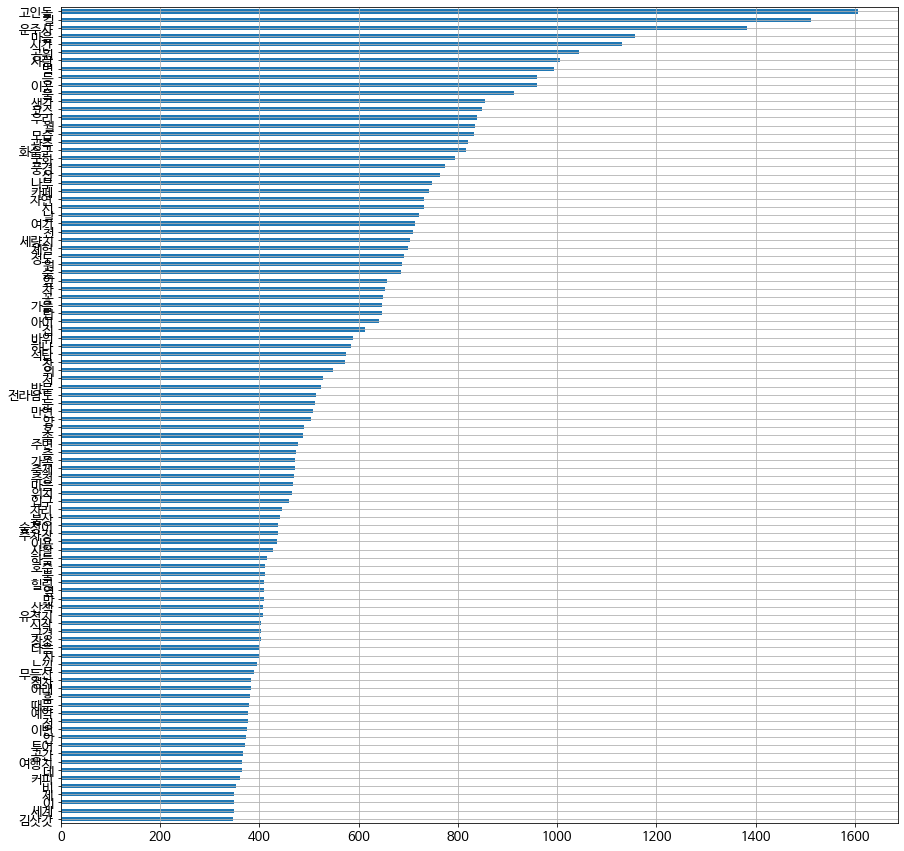

In [ ]:
y_pos = np.arange(len(top_nouns))
plt.figure(figsize = (15,15))
df['Cnt'].plot(kind='barh',grid=True)
plt.yticks(y_pos,top_nouns.keys())
plt.gca().invert_yaxis() 
plt.show()

#WordCloud

In [ ]:
from wordcloud import WordCloud 
wc = WordCloud(background_color = 'white',font_path="./font/NanumBarunGothic.ttf")
wc.generate_from_frequencies(top_nouns)

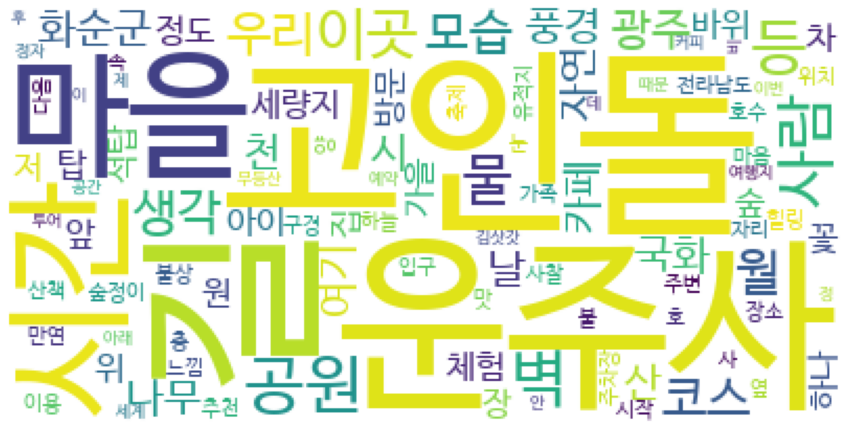

In [ ]:
figure = plt.figure(figsize=(15,15))
ax = plt.subplot()
ax.axis('off')
ax.imshow(wc)
plt.show()

#TreeMap

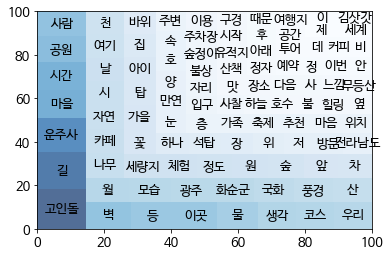

In [ ]:
import squarify
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()), 
                            vmax=max(top_nouns.values()))
colors=[mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7);

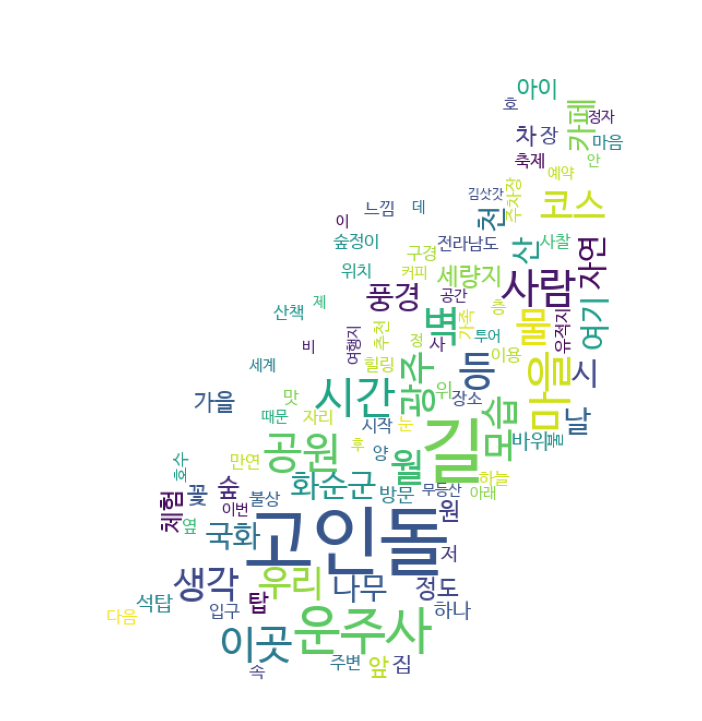

In [ ]:
from PIL import Image
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('/content/drive/Shareddrives/과제 데이터/전남 화순 sns 분석을 통한 관광지 홍보/PNG/화순.png'))
wc=WordCloud(font_path="./font/NanumBarunGothic.ttf",relative_scaling=0.7 ,mask=mask,
              background_color='white',
              min_font_size=1,
              max_font_size=70,
              max_words=2000).generate_from_frequencies(top_nouns)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.show()